In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import mplcyberpunk
#import tqdm
#from functions import nth_derivative

In [2]:
nodos=50
ANN = nn.Sequential(nn.Linear(1, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,2))
print(ANN)

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=2, bias=True)
)


In [3]:
ANN.load_state_dict(torch.load('quintaesencia'))
ANN.eval()

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=2, bias=True)
)

In [4]:
#The domain and the batch for the training
ti=-2.4 #z=10
tf=0.0 #z=0

t=torch.linspace(ti,tf,1000).view(-1,1)

In [5]:
#observational data:
datosH=np.loadtxt('datosH.txt')
datosH = torch.Tensor(datosH)
z=datosH[:,0].view(-1,1)
H=datosH[:,1].view(-1,1)

In [8]:
# Definimos el sistema de ecuaciones
ld=0.008
Olm0=0.3

y0=np.sqrt((1-Olm0)/ (Olm0*(1.0+10.0)**3 +1.0 - Olm0))
y0

def f(X,N):
    x,y=X
    Dx = -3*x + 1.22*ld*y**2 + 1.5*x*(1+x**2-y**2)
    Dy = -1.22*ld*x*y + 1.5*y*(1+x**2 - y**2)
    # Combine Dx and Dy into a single array
    return np.array([Dx, Dy])


# Definimos las condiciones iniciales
x0 = 0.0
#y0 = 0.3

# Definimos el intervalo de integración
N_0 = -2.4
N_f = 0

N=np.linspace(N_0,N_f,50)

# Solucionamos la ecuación diferencial
sol = odeint(f, [x0, y0],N)


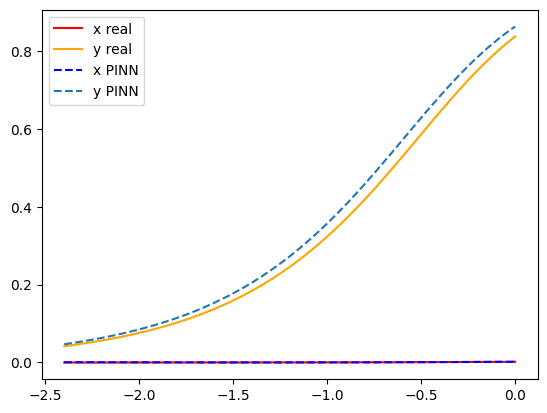

In [9]:
sol_x=ANN(t)[:,0].view(-1,1)
sol_y=ANN(t)[:,1].view(-1,1)
#rhol=ANN(z)[:,2].view(-1,1)
#Hz = 67.0


plt.plot(N,sol[:, 0], label='x real', color='red')
plt.plot(N, sol[:, 1], label='y real', color='orange')
    
plt.plot(t.detach(),sol_x.detach(), '--',label='x PINN', color='blue')
plt.plot(t.detach(),sol_y.detach(), '--', label='y PINN')
plt.legend()

In [10]:
zH=torch.linspace(0.0,3.0,30).view(-1,1)
# sol_x=ANN(-torch.log(zH+1))[:,0].view(-1,1)
# sol_y=ANN(-torch.log(zH+1))[:,1].view(-1,1)
H_quin=67.0*torch.sqrt( Olm0/(1-sol_x**2 - sol_y**2) * torch.exp(-3*t) )

L_data = -torch.log(z+1)
x_data, y_data=ANN(L_data)[:,0].view(-1,1), ANN(L_data)[:,1].view(-1,1)

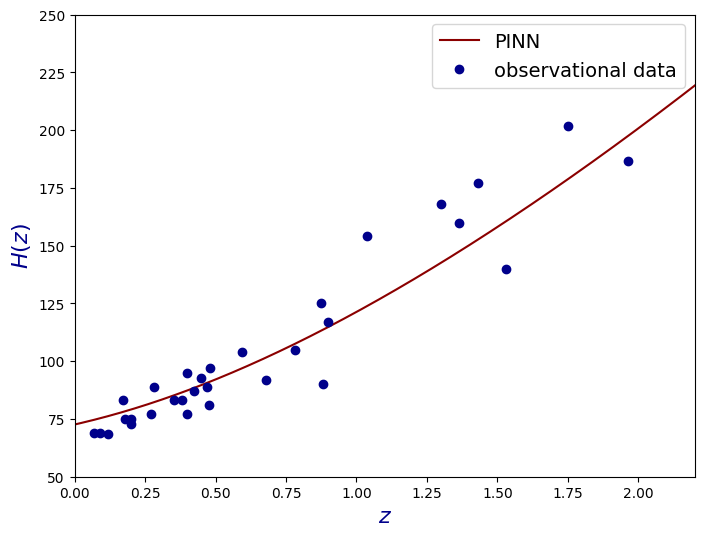

In [11]:

plt.figure(figsize=(8, 6))
plt.plot(torch.exp(-t).detach()-1.0, H_quin.detach(), label='PINN', color='darkred')
plt.plot(z.detach(),H,'o', label='observational data', color='darkblue')
plt.xlabel('$z$', size=16, color='darkblue')
plt.ylabel('$H(z)$', size=16, color='darkblue')
plt.xlim(0,2.2)
plt.ylim(50,250)
plt.legend(fontsize=14)

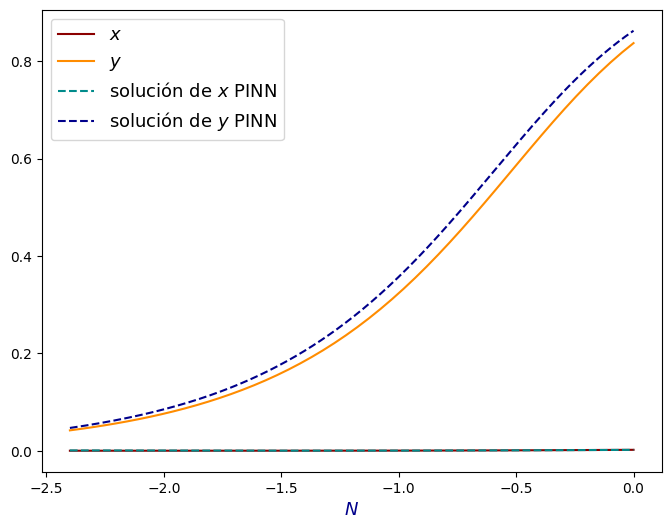

In [12]:
plt.figure(figsize=(8, 6))
sol_x=ANN(t)[:,0].view(-1,1)
sol_y=ANN(t)[:,1].view(-1,1)

plt.plot(N,sol[:, 0], label='$x$', color='darkred')
plt.plot(N, sol[:, 1], label='$y$', color='darkorange')
plt.xlabel('$N$', color='darkblue', size=13)
#plt.ylabel('$', color='darkblue', size=13)
plt.plot(t.detach(),sol_x.detach(), '--',label='solución de $x$ PINN', color='darkcyan')
plt.plot(t.detach(),sol_y.detach(), '--', label='solución de $y$ PINN', color='darkblue')
plt.legend(fontsize=13)

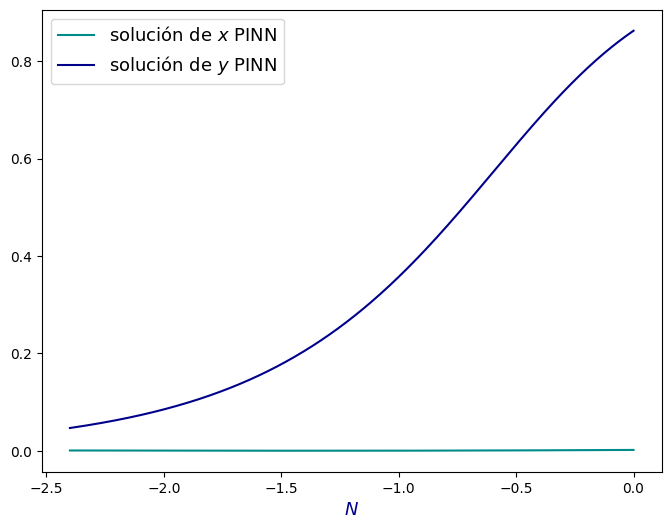

In [13]:
plt.figure(figsize=(8, 6))
sol_x=ANN(t)[:,0].view(-1,1)
sol_y=ANN(t)[:,1].view(-1,1)

# plt.plot(N,sol[:, 0], label='$x$', color='darkred')
# plt.plot(N, sol[:, 1], label='$y$', color='darkorange')
plt.xlabel('$N$', color='darkblue', size=13)
#plt.ylabel('$', color='darkblue', size=13)
plt.plot(t.detach(),sol_x.detach(),label='solución de $x$ PINN', color='darkcyan')
plt.plot(t.detach(),sol_y.detach(), label='solución de $y$ PINN', color='darkblue')
plt.legend(fontsize=13)

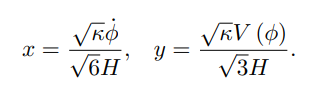

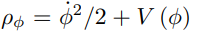



*dadas las soluciones para $x$, $y$ dadas por la red neuronal, vamos a definir el cambio de variable a $\rho$ y $\phi$*

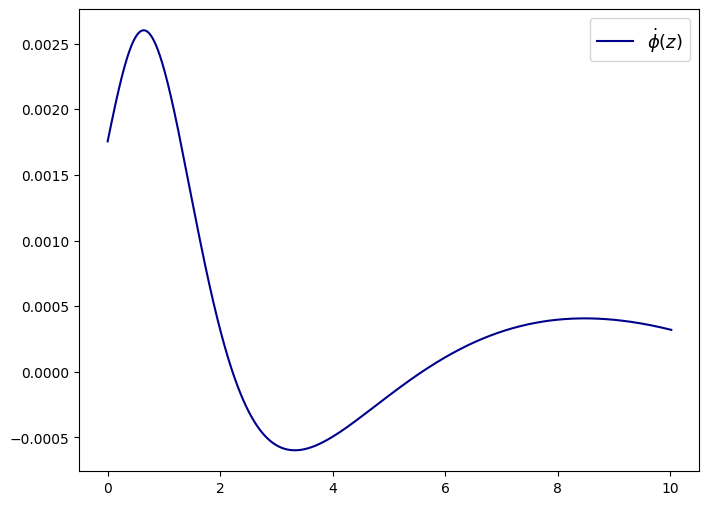

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1).detach(),
         color='darkblue', label = '$\dot{\phi}(z)$')

plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,1].view(-1,1).detach(),
         color='darkblue', label = '$V(z)$')

plt.legend(fontsize=13)

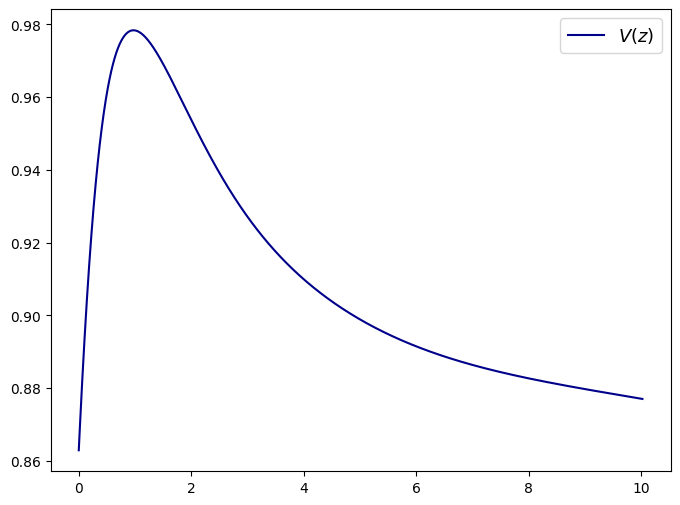

In [31]:
plt.figure(figsize=(8, 6))
# plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1).detach(),
#          color='darkblue', label = '$\dot{\phi}(z)$')

plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,1].view(-1,1).detach(),
         color='darkblue', label = '$V(z)$')

plt.legend(fontsize=13)

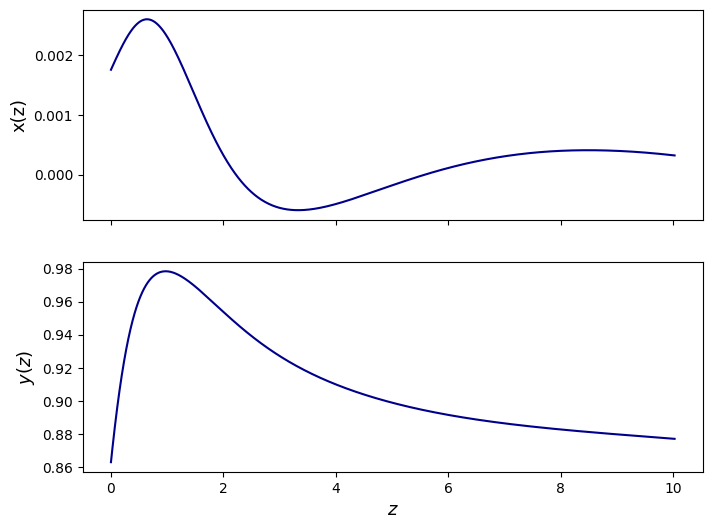

In [63]:
# Definimos el tamaño de la figura
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Creamos los subplots
ax1 = axs[0]
ax2 = axs[1]

# Etiquetamos los ejes
ax1.set_ylabel('x(z)', fontsize=13)
ax2.set_ylabel('$y(z)$', fontsize=13)
ax2.set_xlabel('$z$', fontsize=13)

# Creamos las líneas
ax1.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1).detach(),
         color='darkblue')

ax2.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,1].view(-1,1).detach(),
         color='darkblue', label = '$V(z)$')
plt.savefig('x_y.pdf')

# Estableciendo la constante gravitacional de Einstein $\kappa = 1$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


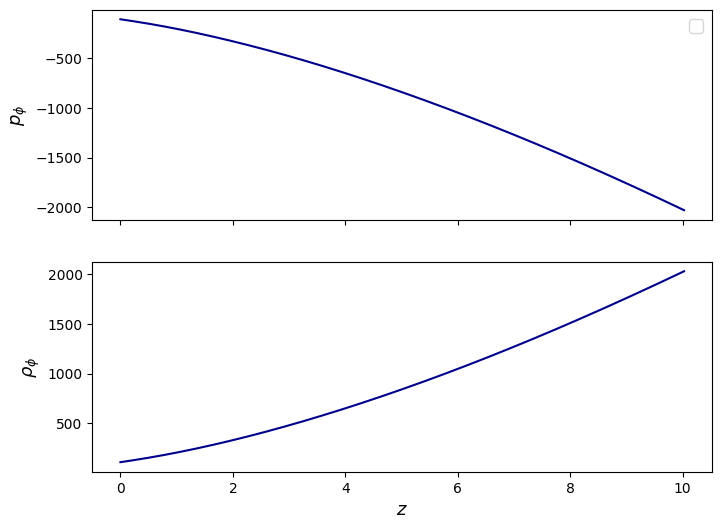

In [64]:
H_quin=67.0*torch.sqrt( Olm0/(1-sol_x**2 - sol_y**2) * torch.exp(-3*t) )
x_z =  ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1)
y_z=  ANN(torch.exp(-t).detach()-1.0)[:,1].view(-1,1)

P_phi = 0.5*(6*H_quin**2 * x_z**2) - 1.72*H_quin*y_z
rho_phi = 0.5*(6*H_quin**2 * x_z**2) + 1.72*H_quin*y_z
# grafica para phi y V
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Creamos los subplots
ax1 = axs[0]
ax2 = axs[1]

# Etiquetamos los ejes
ax1.set_ylabel('$p_\phi$', fontsize=13)
ax2.set_ylabel('$\\rho_\phi$', fontsize=13)
ax2.set_xlabel('$z$', fontsize=13)

# Creamos las líneas
# ax1.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1).detach(),
#          color='darkblue')

ax1.plot(torch.exp(-t).detach()-1.0, P_phi.detach(),
          color='darkblue')
ax2.plot(torch.exp(-t).detach()-1.0, rho_phi.detach(),
          color='darkblue', label = '$V(z)$')

# Añadimos la leyenda
ax1.legend(fontsize=13)
plt.savefig('p_rho.pdf')

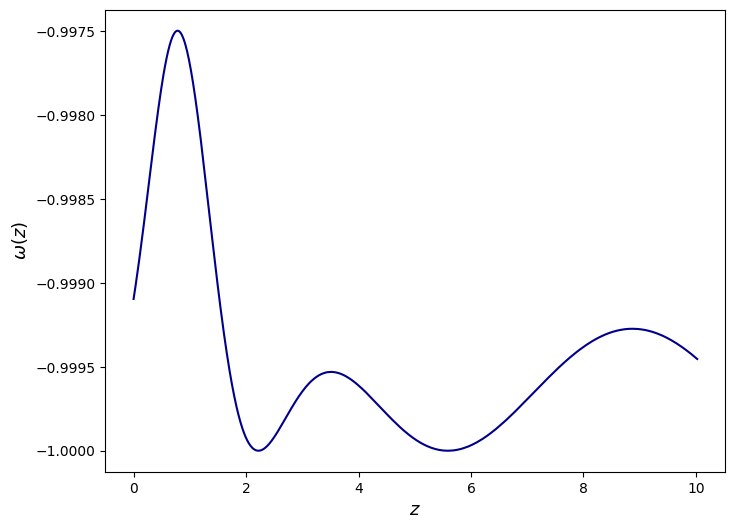

In [65]:
plt.figure(figsize=(8,6))
plt.plot(torch.exp(-t).detach()-1.0,P_phi.detach()/rho_phi.detach(), color='darkblue')
plt.xlabel('$z$', size=13)
plt.ylabel('$\omega(z)$', size=13);
plt.savefig('eq_edo.pdf')